In [1]:
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
img_A_1 = Image.open("sample_dataset/train/rgb/f1334_u4591.png")
img_B_1 = Image.open("sample_dataset/train/tactile/f1334_u4591.png")

img_A_2 = Image.open("sample_dataset/train/rgb/f1334_u4592.png").convert('RGB')
img_B_2 = Image.open("sample_dataset/train/tactile/f1334_u4592.png")

In [22]:
import torch
import numpy as np
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
to_tensor = ToTensor()

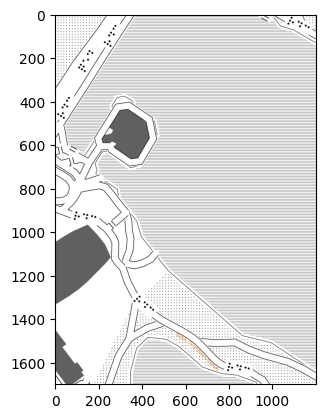

In [4]:
plt.imshow(img_B_1)

In [26]:
# Batch of 2 images in tensor format
img_A_1 = to_tensor(img_A_1)
img_B_1 = to_tensor(img_B_1)

img_A_2 = to_tensor(img_A_2)
img_B_2 = to_tensor(img_B_2)

# Concatenate images
img_A = torch.cat([img_A_1, img_A_2], dim=2)
img_B = torch.cat([img_B_1, img_B_2], dim=2)



In [27]:
grid = make_grid([img_A, img_B], nrow=2)

RuntimeError: stack expects each tensor to be equal size, but got [3, 849, 1198] at entry 0 and [1, 1700, 2400] at entry 1

AttributeError: 'PngImageFile' object has no attribute 'shape'

In [28]:
from src.data.datamodule import PairedDataModule

In [29]:
dm = PairedDataModule(
  data_dir="sample_dataset",
  batch_size=1,
)
dm.setup()

In [30]:
for batch in dm.train_dataloader():
  img_A, img_B = batch['A'], batch['B']
  print(img_A.shape, img_B[0][2].max())
  break

torch.Size([1, 3, 512, 512]) tensor(1.)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


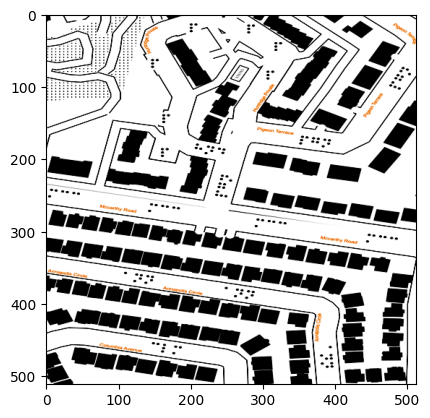

In [33]:
plt.imshow(img_A[0].permute(1, 2, 0).numpy())